# Gradient Descent Julia Animation #

This piece of Julia visualises the gradient descent algorithm as an animation on a simple plane u. Please note that the kernel for this Jupyter notebook is Julia (not Python).



┌ Info: Saved animation to c:\Users\luisb\Desktop\Numerical_Methods\Project\gradient_descent_animation.gif
└ @ Plots C:\Users\luisb\.julia\packages\Plots\ocKqQ\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\luisb\\Desktop\\Numerical_Methods\\Project\\gradient_descent_animation.gif")
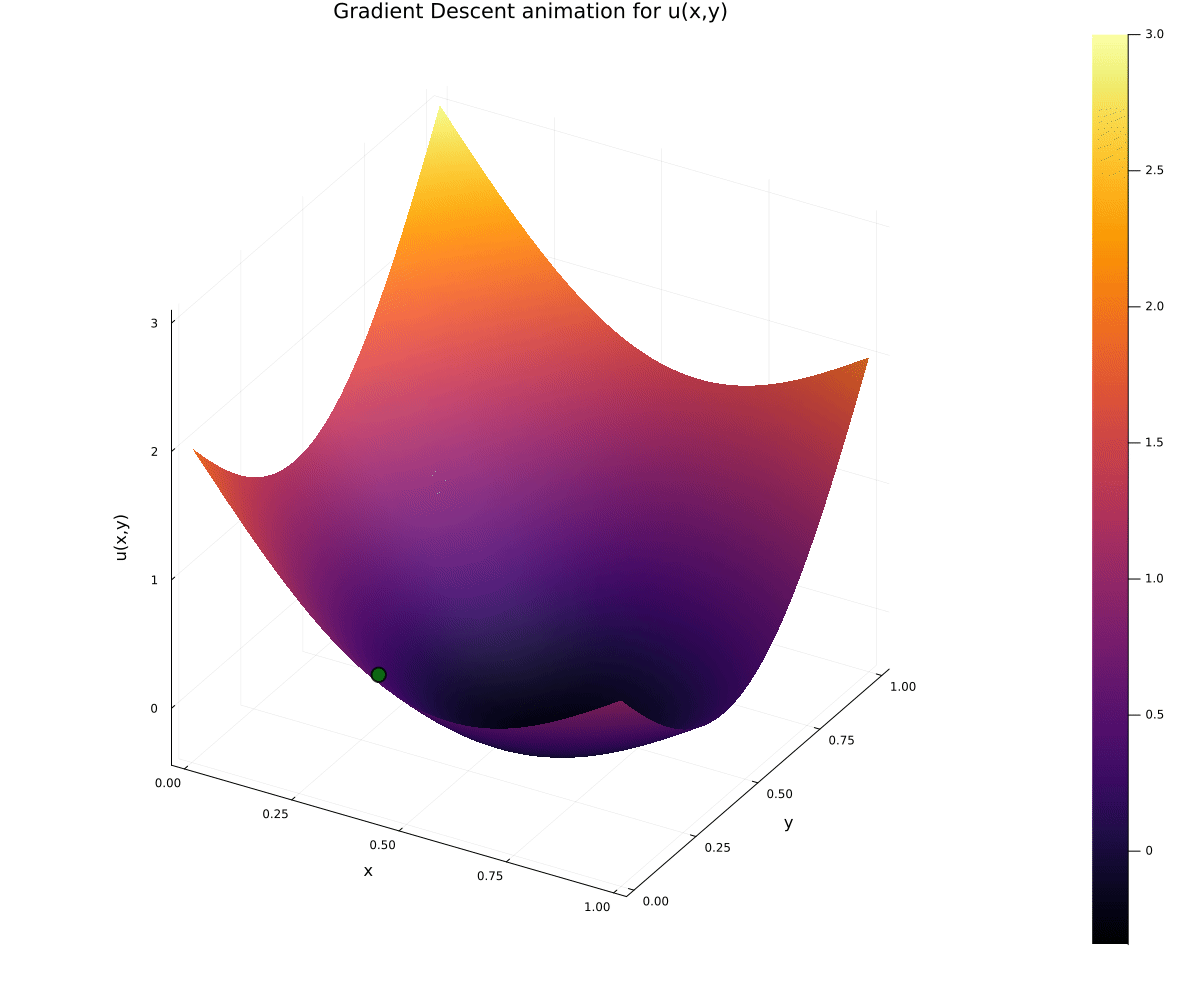

In [ ]:
using Plots
using Random

# Define the function and its gradients
usol(x, y) = -sinpi(x) - sinpi(y) + 2 + y^2 - x

# Manually computed gradients
function grad_usol(x, y)
    dx = -pi * cospi(x) - 1
    dy = -pi * cospi(y) + 2 * y
    return dx, dy
end

# Parameters for the grid
N = 100  # Number of points in x-direction
M = 100  # Number of points in y-direction
rangeVar = 1  # Maximum value for x and y

# Define the x and y grids
x_vals = range(0, stop=rangeVar, length=N)
y_vals = range(0, stop=rangeVar, length=M)

# Create a matrix to store the function values
u_vals = [usol(x, y) for y in y_vals, x in x_vals]

# Gradient descent parameters
learning_rate = 0.005
num_iterations = 30

# Initialize a random starting point within the range [0, rangeVar] for x and y
x_point = rand() * rangeVar
y_point = rand() * rangeVar

# Set your own custom starting point
### x_point = 0.2
### y_point = 0.9



# Store the descent path for plotting
descent_path = [(x_point, y_point, usol(x_point, y_point))]

# Perform gradient descent and record each step
for _ in 1:num_iterations
    # Compute the gradient at the current point
    dx, dy = grad_usol(x_point, y_point)
    
    # Update the point based on the gradient
    x_point -= learning_rate * dx
    y_point -= learning_rate * dy
    
    # Store the new point in the descent path
    push!(descent_path, (x_point, y_point, usol(x_point, y_point)))
end

# Create an animation
anim = @animate for i in 1:length(descent_path)
    # Plot the surface
    p = plot(
        x_vals, y_vals, u_vals,
        st=:surface,
        xlabel="x", ylabel="y", zlabel="u(x,y)",
        title="Gradient Descent animation for u(x,y)",
        size=(1200, 1000)
    )

    # Plot each point in the descent path up to the current frame
    for j in 1:i
        x, y, z = descent_path[j]
        scatter!(
            p, [x], [y], [z],
            marker=:circle, markersize=8,  # Increase marker size for visibility
            color=:green,                  # Set color to bright green
            alpha=0.8,                     # Slight transparency for visibility
            label=false
        )
    end
end

# Save the animation as a GIF
gif(anim, "gradient_descent_animation.gif", fps=10)
